# Biologically-Inspired Information Propagation in Synthetic Networks: Tree vs. Closed-Loop Structures

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

# Hierarchical Graph using a Random Tree Generator Example

In [3]:
# number of nodes
n = 50
G_tree = nx.random_tree(n) 
nx.draw(G_tree, with_labels=True)
plt.show()


AttributeError: module 'networkx' has no attribute 'random_tree'

# Small-world Closed Network with Cycles Example

The Small-World Model is a type of network structure that captures the balance between regular lattice-like organization and random connectivity, allowing for efficient information transfer while maintaining local clustering. It was first introduced by Duncan Watts and Steven Strogatz (1998) to explain the "six degrees of separation" phenomenon observed in social networks.

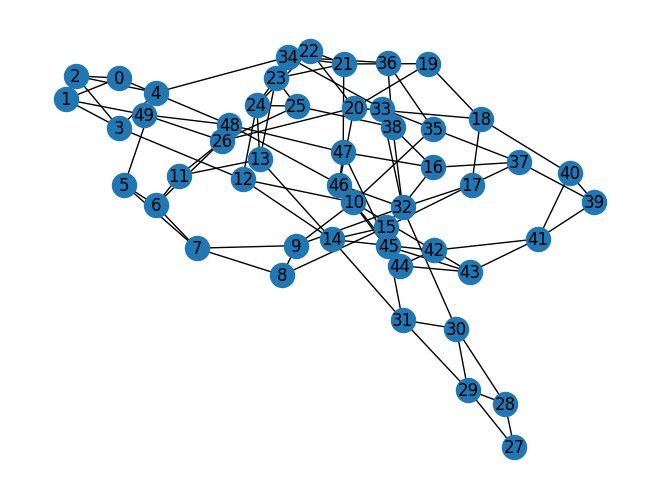

In [3]:
# number of nodes
n = 50
G_loop = nx.watts_strogatz_graph(n, k=4, p=0.3)  
nx.draw(G_loop, with_labels=True)
plt.show()

# Constructing the Networks

In [5]:
# Basic method
#def generate_tree_graph(depth=3, branching_factor=2):
#    G = nx.balanced_tree(branching_factor, depth, create_using=nx.DiGraph())  # Directed Tree
#    return G

#def generate_loop_graph(n=15, p=0.3):
#    G = nx.watts_strogatz_graph(n, k=4, p=p)  # Small-world, loop-based network
#    return G



# Adjusting the graphs to have the same number of nodes and expand
def generate_tree_graph(depth=3, branching_factor=2):
    """Generates a balanced tree with a specified depth and branching factor."""
    G = nx.balanced_tree(branching_factor, depth, create_using=nx.DiGraph())  # Directed Tree
    return G

def generate_loop_graph(depth=3, branching_factor=2, p=0.3):
    """Generates a small-world loop-based network with a similar number of nodes as the tree."""
    # Calculate the number of nodes in the tree
    num_nodes_tree = (branching_factor**(depth + 1) - 1) // (branching_factor - 1)

    # Ensure the loop network has approximately the same number of nodes
    num_nodes_loop = max(num_nodes_tree, 5)  # Ensure at least 5 nodes to maintain loop structure

    G = nx.watts_strogatz_graph(num_nodes_loop, k=min(4, num_nodes_loop - 1), p=p)  # Small-world graph
    return G



tree_graph = generate_tree_graph(depth=4, branching_factor=3)
loop_graph = generate_loop_graph(depth=4, branching_factor=3)



print(f"Tree Graph Nodes: {len(tree_graph.nodes())}")
print(f"Loop Graph Nodes: {len(loop_graph.nodes())}")


Tree Graph Nodes: 121
Loop Graph Nodes: 121


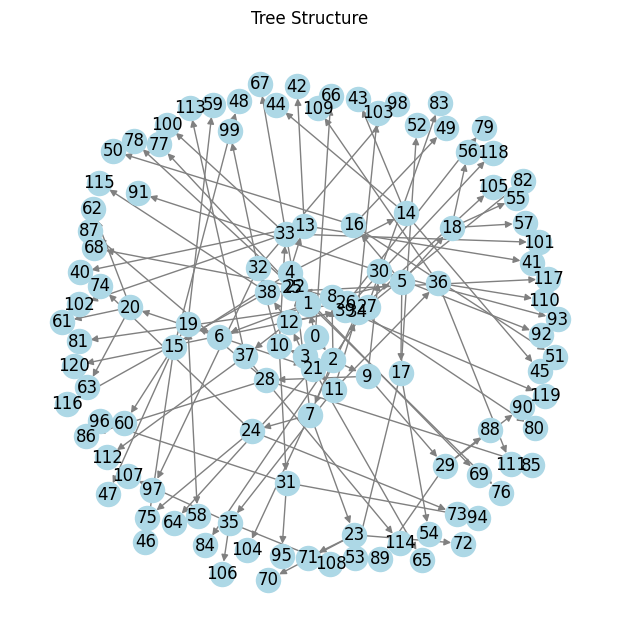

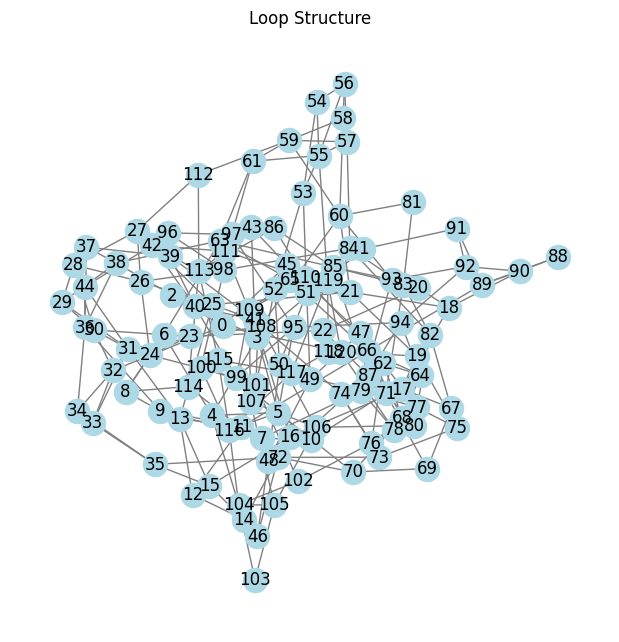

In [6]:
def visualize_graph(G, title="Network Graph"):
    plt.figure(figsize=(6,6))
    nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.title(title)
    plt.show()

    
    
visualize_graph(tree_graph, "Tree Structure")
visualize_graph(loop_graph, "Loop Structure")

# Initiate Information Propagation

In [7]:
def simulate_stepwise_info_flow(G, source_node=0, max_steps=10):
    active_nodes = {source_node}  # Nodes that have received the message
    time_to_reach = {source_node: 0}  # Time when each node gets the message
    all_steps = []

    for t in range(1, max_steps+1):
        new_active_nodes = set()
        for node in active_nodes:
            neighbors = list(G.neighbors(node))
            for neighbor in neighbors:
                if neighbor not in time_to_reach:  # Not already reached
                    time_to_reach[neighbor] = t
                    new_active_nodes.add(neighbor)
        
        if not new_active_nodes:
            break  # Stop if no new nodes are reached
        
        active_nodes.update(new_active_nodes)
        all_steps.append(list(active_nodes))  # Store step-wise progress
    
    return all_steps

# Run Simulation
tree_steps = simulate_stepwise_info_flow(tree_graph)
loop_steps = simulate_stepwise_info_flow(loop_graph)

print("Stepwise propagation in Tree Network:", tree_steps)
print("Stepwise propagation in Loop Network:", loop_steps)


Stepwise propagation in Tree Network: [[0, 1, 2, 3], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]]
Stepwise propagation in Loop Network: [[0, 32, 2, 120, 45], [0, 2, 3, 78, 19, 30, 31, 32, 33, 34, 38, 43, 45, 47, 118, 119, 120], [0, 1, 2, 3, 4, 5, 13, 17, 19, 21, 23, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 43, 44, 45, 47, 49, 55, 63, 75, 76, 7

# Visualizing Propagation Over Time

In [8]:
import time

def visualize_propagation(G, steps, title="Information Propagation"):
    plt.figure(figsize=(6,6))
    pos = nx.spring_layout(G)  # Define layout
    
    for t, active_nodes in enumerate(steps):
        plt.clf()
        plt.title(f"{title} - Step {t+1}")
        nx.draw(G, pos, with_labels=True, node_color=['red' if node in active_nodes else 'lightblue' for node in G.nodes()],
                edge_color='gray')
        plt.pause(1)  # Pause to show progression

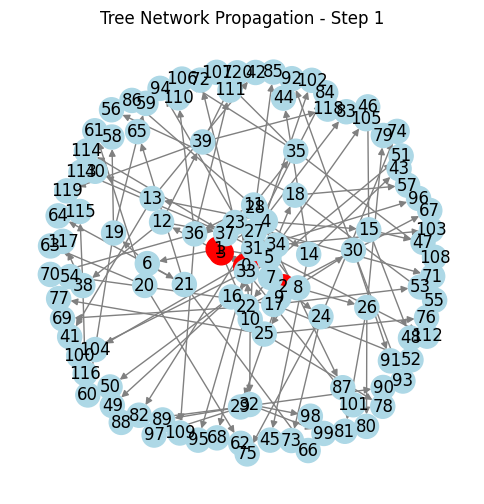

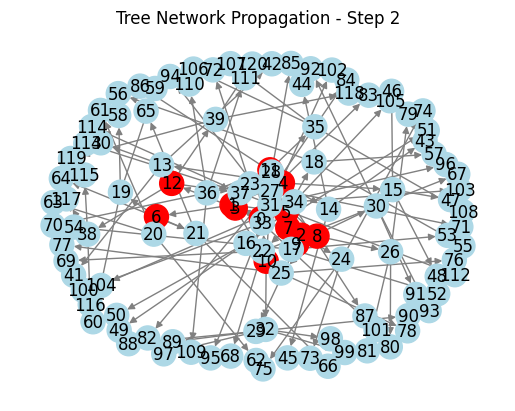

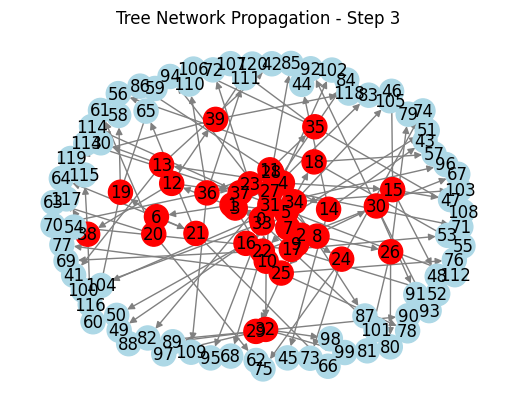

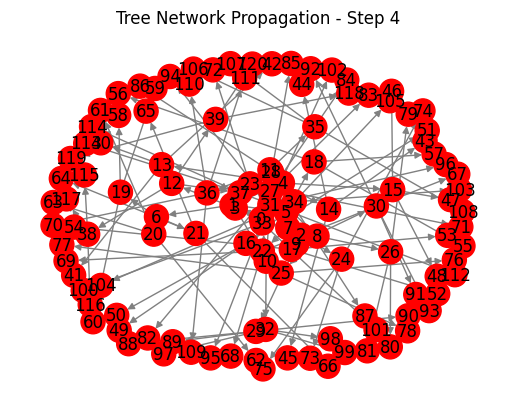

In [9]:
visualize_propagation(tree_graph, tree_steps, "Tree Network Propagation")

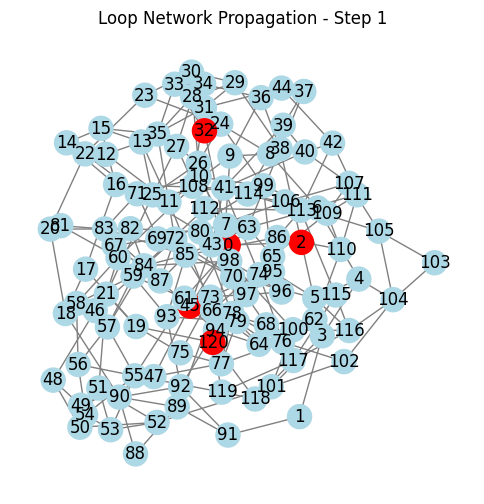

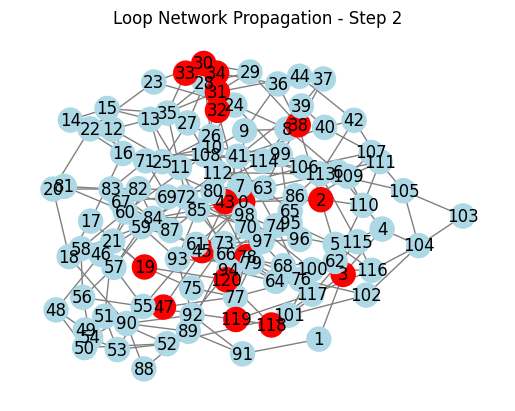

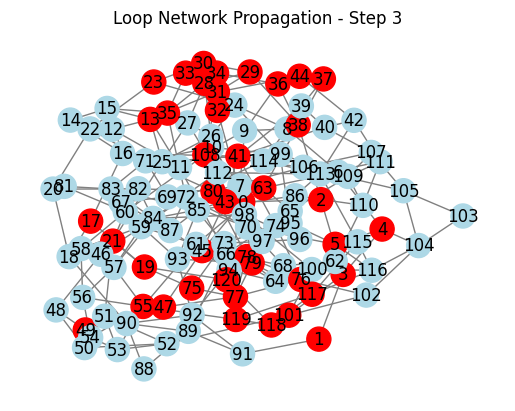

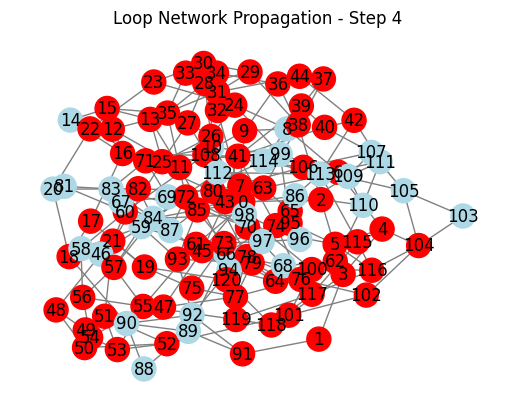

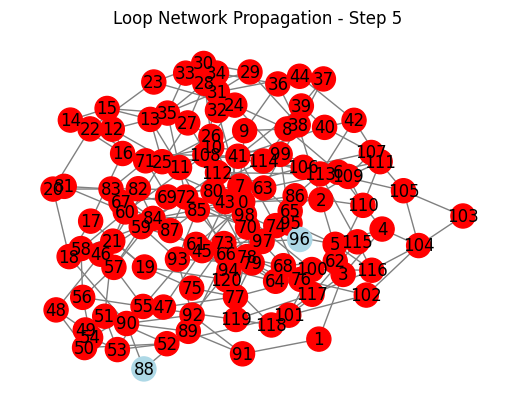

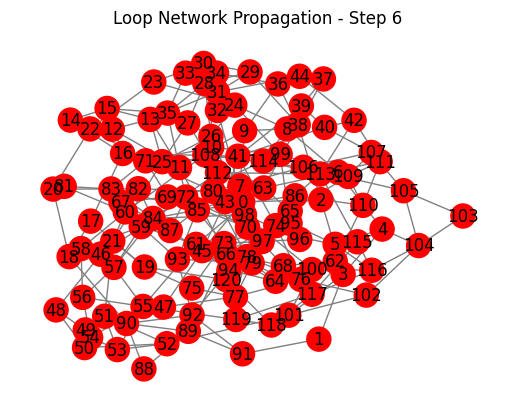

In [10]:
visualize_propagation(loop_graph, loop_steps, "Loop Network Propagation")

# Compare Propagation Speed and Robustness

In [11]:
def calculate_metrics(steps, total_nodes):
    max_time = len(steps)
    reachability = [len(step)/total_nodes for step in steps]
    return max_time, reachability

tree_time, tree_reach = calculate_metrics(tree_steps, tree_graph.number_of_nodes())
loop_time, loop_reach = calculate_metrics(loop_steps, loop_graph.number_of_nodes())

print(f"Tree Network - Total Time: {tree_time} steps, Final Reach: {tree_reach[-1]*100:.2f}%")
print(f"Loop Network - Total Time: {loop_time} steps, Final Reach: {loop_reach[-1]*100:.2f}%")


Tree Network - Total Time: 4 steps, Final Reach: 100.00%
Loop Network - Total Time: 6 steps, Final Reach: 100.00%
